In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      #1 is fault 0 is actual
from sklearn.model_selection import train_test_split
import xgboost
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#change the location first
Ref_case = pd.read_csv(r'E:\Thesis\transformer data 36\Ref_case_44.csv')
Site_case = pd.read_csv(r'E:\Thesis\transformer data 36\site_case_44.csv')

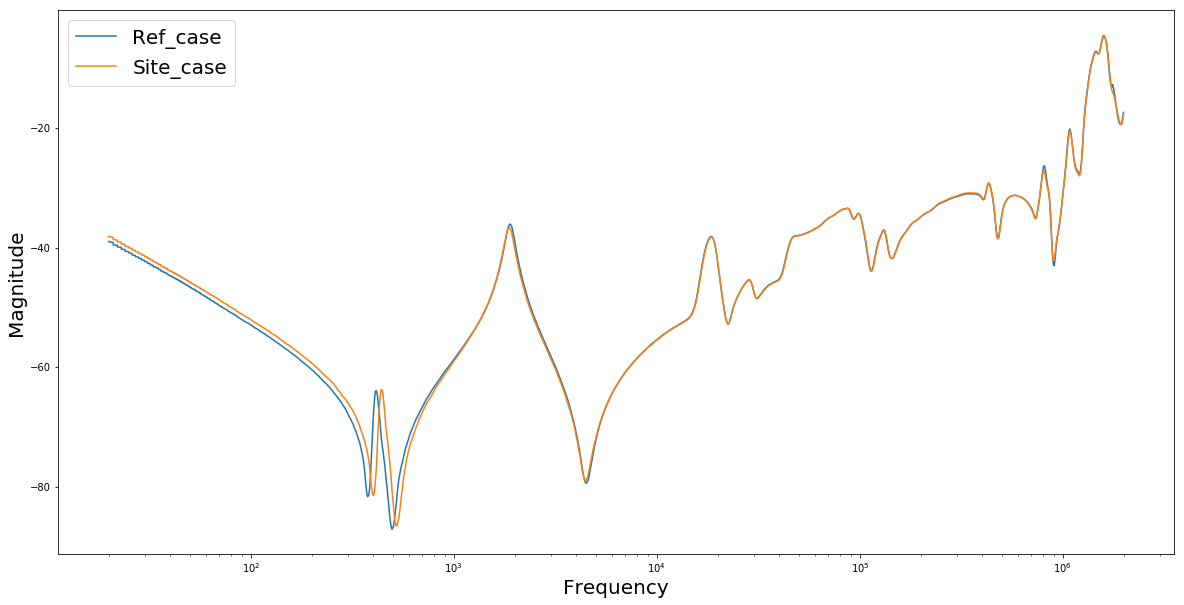

In [2]:
plt.figure(figsize=(20,10))
a = plt.plot(Ref_case['Frequency'], Ref_case['Magnitude'], label='Ref_case')
b = plt.plot(Site_case['Frequency'], Site_case['Magnitude'], label= 'Site_case')
plt.xscale('log')
plt.xlabel('Frequency', fontsize = 20)
plt.ylabel('Magnitude', fontsize = 20)
plt.legend(fontsize = 20)

In [3]:
Ref_case=np.array(Ref_case)
Site_case= np.array(Site_case)

In [4]:
case= np.vstack([Ref_case,Site_case])

In [5]:
case.shape

(2082, 2)

In [6]:
X = case

In [7]:
X.shape

(2082, 2)

In [8]:
y = np.zeros((2082))
y

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
y[1041:] = 1

In [10]:
y.shape

(2082,)

In [11]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [12]:
test_size= .20
seed= 1

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=seed)

In [13]:
model = xgboost.XGBClassifier(learning_rate =0.0001, n_estimators=21, 
                        max_depth= 3, min_child_weight= 1, gamma=0.1,
                        nthread=1, scale_pos_weight=1 )
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.0001,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=21, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Accuracy: 49.64%


In [14]:
#predictions= clf.predict(X_test)
print(accuracy_score(y_test, predictions)*100,'%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

49.64028776978417 %
[[200   1]
 [209   7]]
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       201
         1.0       0.88      0.03      0.06       216

   micro avg       0.50      0.50      0.50       417
   macro avg       0.68      0.51      0.36       417
weighted avg       0.69      0.50      0.35       417

